** Data Set Summary :** The dataset contains information on various cars about their different technical aspects and specifications such as their make, number of doors, horsepower, engine size, city and highway mpg etc. 

** Data Source : ** https://archive.ics.uci.edu/ml/datasets/Automobile

** Goal :** The goal of this project is to ***predict the prices of cars*** based on the available specifications.

#### Collecting Data

In [2]:
# Importing all the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
col_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv(r'C:\Users\duttaroym\Documents\Python\imports-85.data', names=col_names)

#### Exploring the Data

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


While inspecting, it appears that the dataset has missing values and those are indicated with '?' mark. 

The dataset is not showing any null values because all the missing value is filled with '?' .

#### Cleaning and Transforming the Data

In [6]:
# Counting missing values
cars['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
134     6
128     6
103     5
168     5
102     5
95      5
85      5
65      5
94      5
74      5
93      4
118     4
122     4
148     4
106     4
137     3
125     3
101     3
154     3
115     3
83      3
194     2
164     2
197     2
89      2
192     2
158     2
108     2
87      2
129     2
110     2
119     2
113     2
153     2
81      2
188     2
145     2
107     1
186     1
98      1
256     1
78      1
77      1
121     1
142     1
90      1
231     1
Name: normalized-losses, dtype: int64

Inquiring the range of missing values in 'normalized-losses' column, we can find that there are 41 missing values which are marked with  '?'. Its 20% of the whole dataset. 
So it will not be a good idea to drop such a big amount of data. 

But, the column ***'normalized-losses'*** represents the average loss payment per insured vehicle. 

So, it is unlikely to be a strong predictor of the price of the vehicle. Price can be a predictor of loss of payment but the other-way is not true. 

So we can drop this whole column from our dataset. 

In [7]:
cars.drop('normalized-losses',axis = 1, inplace = True)

In [8]:
# Replacing the '?'
cars.replace("?", np.nan, inplace=True)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-nul

It appears that the new dataframe consists maximum 11 missing values in various columns. Since it is very small number, these observation can be deleted without having any impact on the data. 

In [10]:
# Droppping NaN values
cars.dropna(axis = 0, how = 'any', inplace = 'True')

In [11]:
# Correcting the Datatypes of variables
cars[['price','peak-rpm','horsepower']] = cars[['price','peak-rpm','horsepower']].astype(int)
cars[['stroke','bore',]] = cars[['stroke','bore',]].astype(float)

#### Modelling the Data & Evaluation

In [12]:
# Importing the necessary SciKit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [24]:
# Creating a function to model the data with knn and evaluate using root mean squared error
def knn_train_test(df, col, kval):
    X = df[[col]]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    for k in kval:
        knn = KNeighborsRegressor(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** (1/2)
        print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        plt.xlim([0,10])
        plt.ylim([0,10000])
        plt.xticks([1,3,5,7,9])
        plt.bar(k,rmse)
                         
    plt.show()      
          
    

In [26]:
features = ['highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'engine-size', 'curb-weight', 
            'width', 'length', 'height', 'wheel-base','bore', 'stroke']

RMSE of highway-mpg for k = 1 : 5000.181576190188
RMSE of highway-mpg for k = 3 : 4939.339530170202
RMSE of highway-mpg for k = 5 : 4286.7064438079515
RMSE of highway-mpg for k = 7 : 4166.837604928988
RMSE of highway-mpg for k = 9 : 4343.181017423841


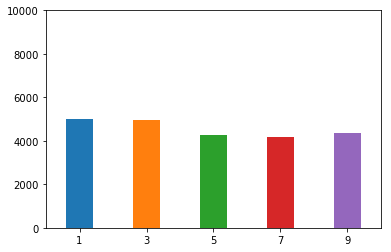

RMSE of city-mpg for k = 1 : 4131.129664836521
RMSE of city-mpg for k = 3 : 3349.8371410853497
RMSE of city-mpg for k = 5 : 3142.054973159918
RMSE of city-mpg for k = 7 : 3374.3793722831474
RMSE of city-mpg for k = 9 : 3446.2967934403678


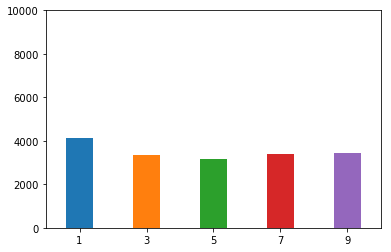

RMSE of peak-rpm for k = 1 : 6723.855357738957
RMSE of peak-rpm for k = 3 : 8930.138172378845
RMSE of peak-rpm for k = 5 : 9629.461996474074
RMSE of peak-rpm for k = 7 : 9501.432470067599
RMSE of peak-rpm for k = 9 : 9570.848995109029


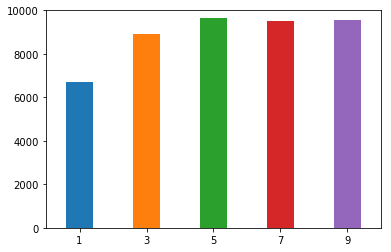

RMSE of horsepower for k = 1 : 3325.0773463145724
RMSE of horsepower for k = 3 : 3698.237116415167
RMSE of horsepower for k = 5 : 3384.0433371474874
RMSE of horsepower for k = 7 : 3882.1193651880108
RMSE of horsepower for k = 9 : 4296.803265193603


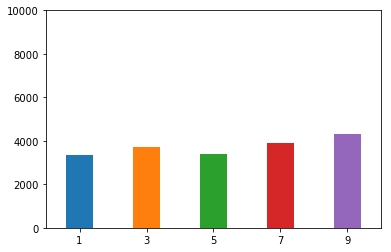

RMSE of engine-size for k = 1 : 3515.0387020519524
RMSE of engine-size for k = 3 : 2933.953387748599
RMSE of engine-size for k = 5 : 3161.734204109495
RMSE of engine-size for k = 7 : 3080.940251630703
RMSE of engine-size for k = 9 : 3091.4557327131665


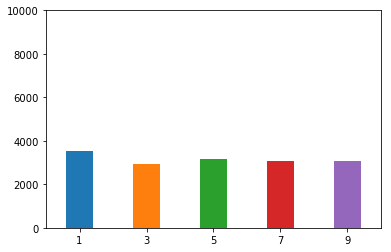

RMSE of curb-weight for k = 1 : 7715.014138279083
RMSE of curb-weight for k = 3 : 6568.054033884221
RMSE of curb-weight for k = 5 : 6000.732379746103
RMSE of curb-weight for k = 7 : 5976.2411883638515
RMSE of curb-weight for k = 9 : 5503.017165234089


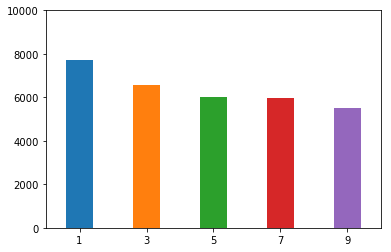

RMSE of width for k = 1 : 3663.8332210670933
RMSE of width for k = 3 : 4286.143566466792
RMSE of width for k = 5 : 4869.419242895083
RMSE of width for k = 7 : 4483.70828533307
RMSE of width for k = 9 : 4346.221760450083


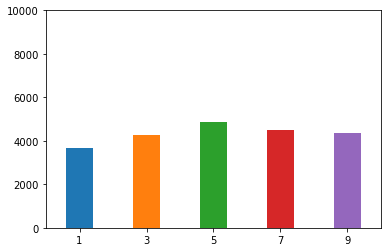

RMSE of length for k = 1 : 4649.543277818553
RMSE of length for k = 3 : 4479.791933380586
RMSE of length for k = 5 : 5279.542394602989
RMSE of length for k = 7 : 6248.229675304296
RMSE of length for k = 9 : 6365.048825957408


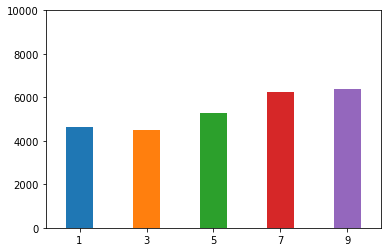

RMSE of height for k = 1 : 8840.994343079232
RMSE of height for k = 3 : 8151.236151687043
RMSE of height for k = 5 : 8274.768820444162
RMSE of height for k = 7 : 8227.34735028806
RMSE of height for k = 9 : 8243.803109476772


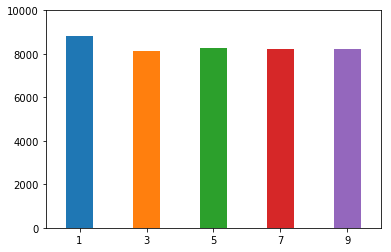

RMSE of wheel-base for k = 1 : 4563.052543289471
RMSE of wheel-base for k = 3 : 4718.009447955478
RMSE of wheel-base for k = 5 : 5107.296163684826
RMSE of wheel-base for k = 7 : 4836.534864070121
RMSE of wheel-base for k = 9 : 4752.266703594781


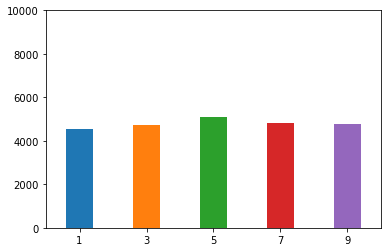

RMSE of bore for k = 1 : 8690.313078955005
RMSE of bore for k = 3 : 7758.890867992956
RMSE of bore for k = 5 : 6931.879451805186
RMSE of bore for k = 7 : 7236.94979818678
RMSE of bore for k = 9 : 7652.749980994083


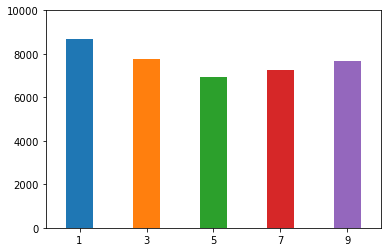

RMSE of stroke for k = 1 : 7918.350075809791
RMSE of stroke for k = 3 : 7718.459756783994
RMSE of stroke for k = 5 : 8320.646652385027
RMSE of stroke for k = 7 : 8302.128644815146
RMSE of stroke for k = 9 : 7995.323248879167


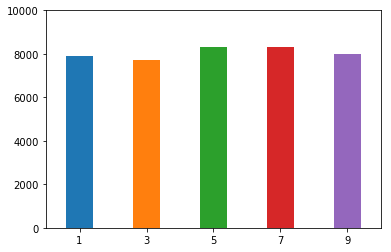

In [15]:
for i in features:
    knn_train_test(cars, i, [1, 3, 5, 7, 9])

From the graphs, we can see for **engine-size** and **horsepower**, the errors are lower than other variables. So I take these 2 variable to create the KNearestNeighbours model for deciding the price of the car

In [16]:
two_var = ['engine-size', 'horsepower']
three_var = ['engine-size', 'horsepower','width' ] # For 3 variables
four_var = ['engine-size', 'horsepower', 'width', 'highway-mpg'] # For 4 variables
five_var = ['engine-size', 'horsepower', 'width', 'highway-mpg','city-mpg'] # for 5 variables

In [27]:
# Creating a function to model and evaluate with a specific k value
def knn_train_test1(df, col, k):
    X = df[col]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** (1/2)
    print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        

In [18]:
knn_train_test1(cars,two_var, 3)
knn_train_test1(cars, three_var, 3)
knn_train_test1(cars, four_var, 3)
knn_train_test1(cars, five_var, 3)

RMSE of ['engine-size', 'horsepower'] for k = 3 : 2246.3217550810546
RMSE of ['engine-size', 'horsepower', 'width'] for k = 3 : 2669.4045074700507
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 3 : 2727.383518603472
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg', 'city-mpg'] for k = 3 : 2498.5332694554013


In [19]:
kval = np.arange(1,26,1) # Listing K-values for hyperparameter optimization

In [20]:
def knn_train_test2(df, col, kval):
    X = df[col]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    for k in kval:
        knn = KNeighborsRegressor(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** (1/2)
        print("RMSE of {} for k = {} : {}".format(col,k, rmse))
        plt.xlim([0,25])
        plt.ylim([0,7000])
        plt.xticks(kval)
        plt.xlabel("K value")
        plt.ylabel("RMSE")
        plt.title("Error graph for each K value")
        plt.bar(k,rmse)
    plt.show()
    

RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 1 : 4722.475977596325
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 2 : 3778.22367026677
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 3 : 2842.802232940683
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 4 : 2304.8208736505717
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 5 : 2496.8210750924145
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 6 : 2938.7532764423368
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 7 : 3245.404181517746
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 8 : 3415.4139051408524
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 9 : 3558.84839799497
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 10 : 3615.516850274022
RMSE of ['engine-size', 'horsepower', 'width', 'highway-mpg'] for k = 11 : 36

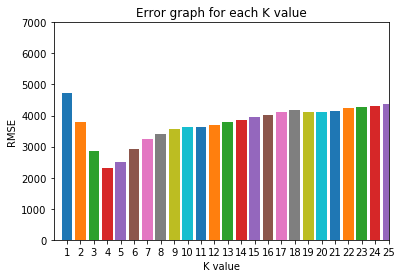

In [23]:
knn_train_test2(cars, four_var, kval)

#### Conclusion

From the graph, we see that the error is higher when k value goes beyind 10. RMSE is in the lower range when k < 10. 
Based on this observation, I choose k=4 and these four variables (engine-size, horsepower, width and highway-mpg) for an 
optimal model for deciding the price of the cars.